In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

1. Load Dataset from an Online Source
Question:

Visit Kaggle or UCI ML Repository and download a dataset of your choice (e.g., Titanic, 
Wine Quality, Diabetes).
- Upload it to Google Colab.
- Load the dataset using pandas.
- Show first 5 and last 5 records.

In [53]:
Titanic = pd.read_csv("./titanic.csv")
Diabetes = pd.read_csv("./diabetes.csv")
WineQT = pd.read_csv("./WineQT.csv")
MallCustomers = pd.read_csv("./Mall_Customers.csv")

In [42]:
# Show first 5
print("Titanic","First 5 records")
Titanic.head()

Titanic First 5 records


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
print("Diabetes","First 5 records")
Diabetes.head()

Diabetes First 5 records


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
print("WineQT","First 5 records")
WineQT.head()

WineQT First 5 records


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [60]:
print("MallCustomers","First 5 records")
MallCustomers.head()

MallCustomers First 5 records


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [24]:
# show last 5 records
print("Titanic","Last 5 records")
Titanic.tail()

Titanic Last 5 records


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
print("Diabetes","Last 5 records")
Diabetes.tail()

Diabetes Last 5 records


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [45]:
print("WineQT","Last 5 records")
WineQT.tail()

WineQT Last 5 records


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [61]:
print("MallCustomers","First 5 records")
MallCustomers.head()

MallCustomers First 5 records


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


2. Correlation Matrix and Heatmap
Question:

Using pandas and seaborn, create a correlation matrix:
- Display correlation of all numeric features using .corr().
- Plot a heatmap of the correlations using seaborn.heatmap().

Correlation Matrix Titanic:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


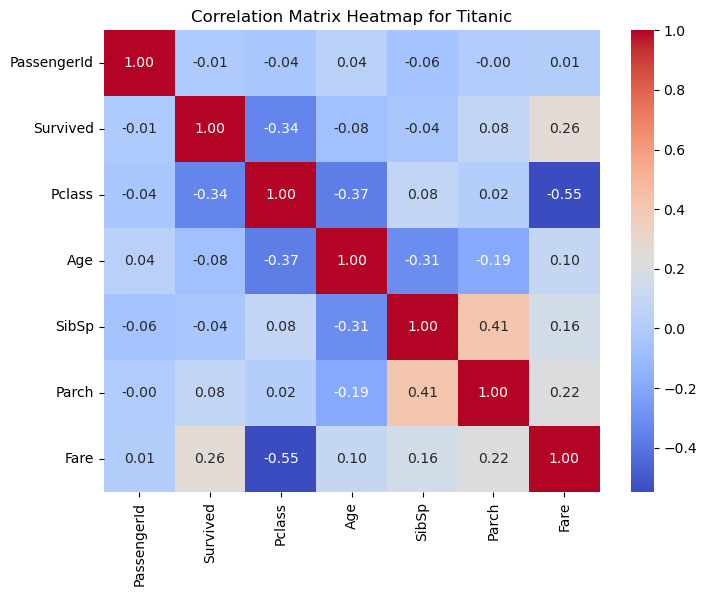

In [34]:
numeric_df = Titanic.select_dtypes(include=['float64', 'int64'])
correlation_matrix_Titanic = numeric_df.corr()

print("Correlation Matrix Titanic:")
print(correlation_matrix_Titanic)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_Titanic, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap for Titanic")
plt.show()

Correlation Matrix Diabetes:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose     

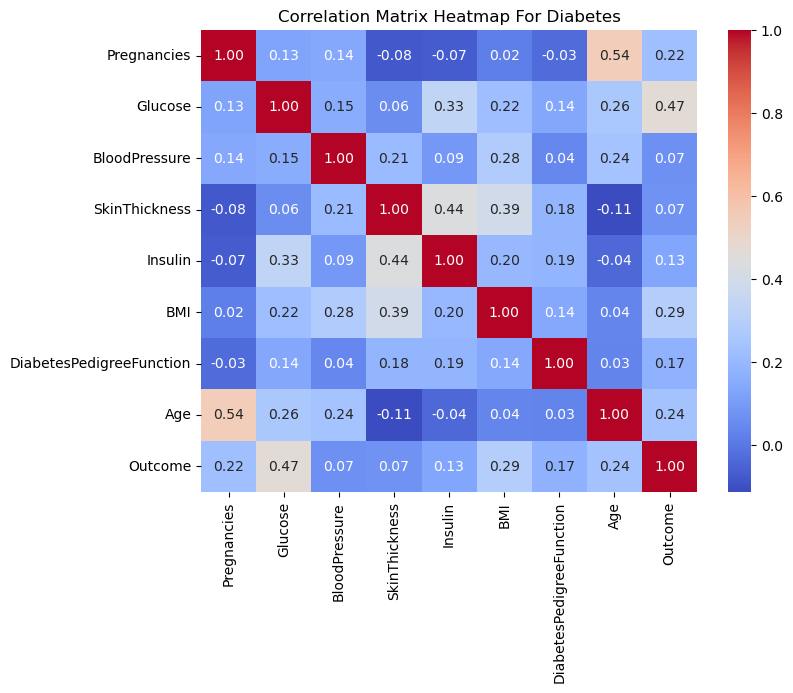

In [33]:
numeric_df = Diabetes.select_dtypes(include=['float64', 'int64'])
correlation_matrix_Diabetes = numeric_df.corr()

print("Correlation Matrix Diabetes:")
print(correlation_matrix_Diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_Diabetes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap For Diabetes")
plt.show()

Correlation Matrix WineQT
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.1390

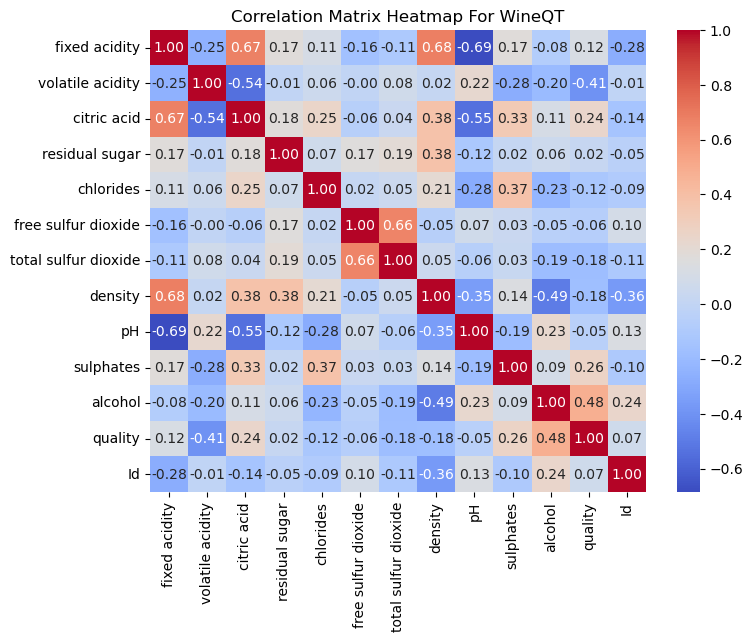

In [47]:
numeric_df = WineQT.select_dtypes(include=['float64', 'int64'])
correlation_matrix_WineQT = numeric_df.corr()

print("Correlation Matrix WineQT")
print(correlation_matrix_WineQT)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_WineQT, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap For WineQT")
plt.show()

Correlation Matrix MallCustomers:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


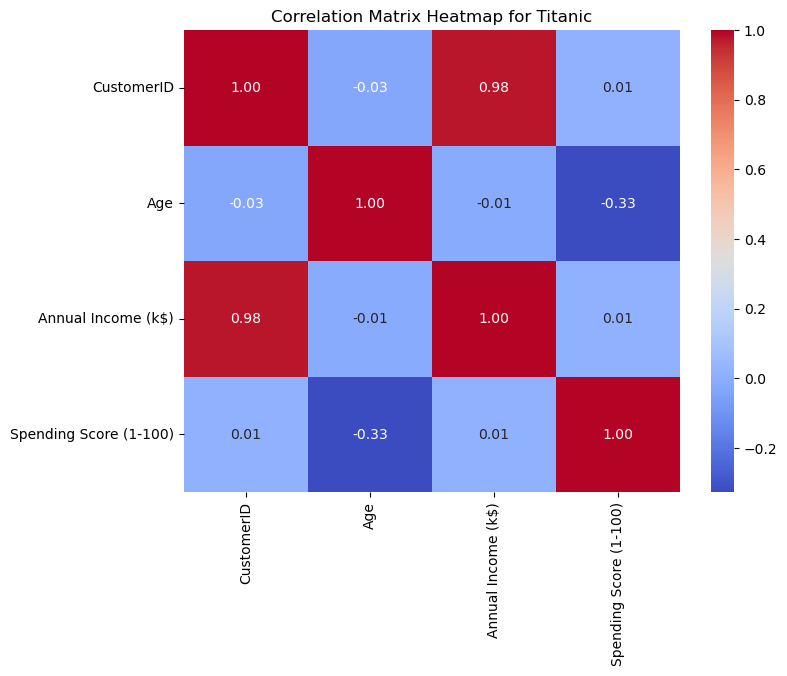

In [62]:
numeric_df = MallCustomers.select_dtypes(include=['float64', 'int64'])
correlation_matrix_MallCustomers = numeric_df.corr()

print("Correlation Matrix MallCustomers:")
print(correlation_matrix_MallCustomers)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_MallCustomers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap for Titanic")
plt.show()

3. Feature Selection from Correlation
Question:

Based on the correlation matrix:
- Identify 2 features that are highly correlated (correlation > 0.85).


In [52]:
high_corr_pairs = []
for col in correlation_matrix_Titanic.columns:
    for index in correlation_matrix_Titanic.index:
        if col != index and correlation_matrix_Titanic[col][index] > 0.85:
            high_corr_pairs.append((col, index, correlation_matrix_Titanic[col][index]))
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("No features with correlation > 0.85 found.")

No features with correlation > 0.85 found.


In [49]:
high_corr_pairs = []
for col in correlation_matrix_Diabetes.columns:
    for index in correlation_matrix_Diabetes.index:
        if col != index and correlation_matrix_Diabetes[col][index] > 0.85:
            high_corr_pairs.append((col, index, correlation_matrix_Diabetes[col][index]))
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("No features with correlation > 0.85 found.")

No features with correlation > 0.85 found.


In [50]:
high_corr_pairs = []
for col in correlation_matrix_WineQT.columns:
    for index in correlation_matrix_WineQT.index:
        if col != index and correlation_matrix_WineQT[col][index] > 0.85:
            high_corr_pairs.append((col, index, correlation_matrix_WineQT[col][index]))
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("No features with correlation > 0.85 found.")

No features with correlation > 0.85 found.


In [63]:
high_corr_pairs = []
for col in correlation_matrix_MallCustomers.columns:
    for index in correlation_matrix_MallCustomers.index:
        if col != index and correlation_matrix_MallCustomers[col][index] > 0.85:
            high_corr_pairs.append((col, index, correlation_matrix_MallCustomers[col][index]))
if high_corr_pairs:
    print("Highly Correlated Feature Pairs (correlation > 0.85):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("No features with correlation > 0.85 found.")

Highly Correlated Feature Pairs (correlation > 0.85):
CustomerID and Annual Income (k$): correlation = 0.98
Annual Income (k$) and CustomerID: correlation = 0.98


4.Using mall customer csv file : 
Find Best K Value (Elbow Method)

Question:
From the elbow plot (Q6), determine the optimal number of clusters k.
- Explain how you chose the best k.
- Visualize the clusters again using the chosen value of k

C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

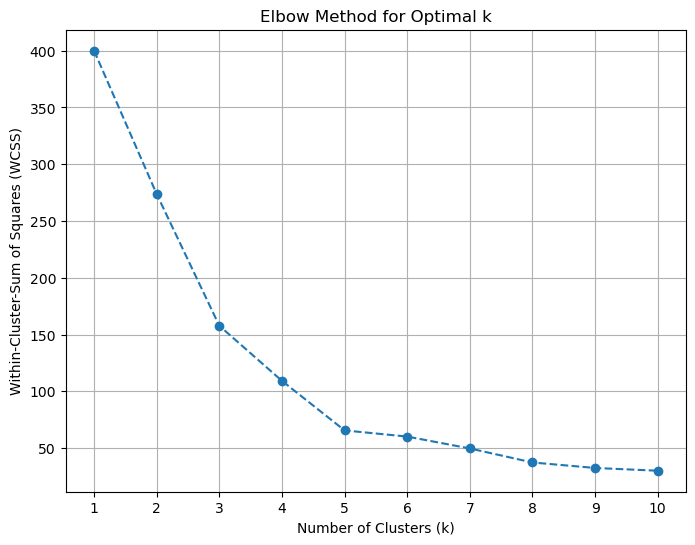

C:\Users\dbda38\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


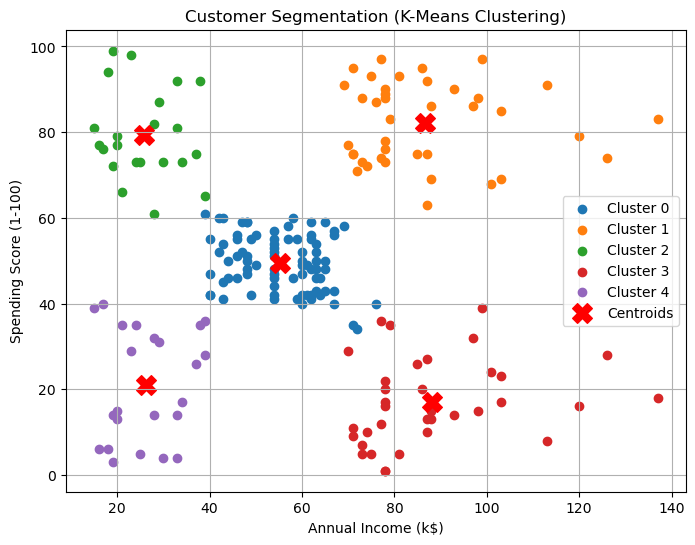

In [59]:
features = MallCustomers[['Annual Income (k$)', 'Spending Score (1-100)']]  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster-Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()
plt.show()

optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

MallCustomers['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = MallCustomers[MallCustomers['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

centroids = kmeans.cluster_centers_
scaled_centroids = scaler.inverse_transform(centroids) 
plt.scatter(scaled_centroids[:, 0], scaled_centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()